In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [6]:
start = '2010-01-01'
end = '2019-12-3'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()


AttributeError: 'NoneType' object has no attribute 'group'

In [7]:
!pip install --upgrade pandas_datareader

In [8]:
!pip install yfinance

In [10]:
import yfinance as yf

start = '2018-12-1'
end = '2019-12-3'

# Fetch data for AAPL from Yahoo Finance
df = yf.download('AAPL', start=start, end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-12-03  46.115002  46.235001  45.302502  46.205002  44.180408  163210000
2018-12-04  45.237499  45.597500  44.067501  44.172501  42.236977  165377200
2018-12-06  42.939999  43.695000  42.605000  43.680000  41.766056  172393600
2018-12-07  43.372501  43.622501  42.075001  42.122501  40.276806  169126400
2018-12-10  41.250000  42.522499  40.832500  42.400002  40.542149  248104000


In [11]:
import yfinance as yf

start = '2010-1-1'
end = '2019-12-31'

# Fetch data for AAPL from Yahoo Finance
df = yf.download('AAPL', start=start, end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454506  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465666  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362819  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351055  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.909004,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974503,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342957,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316284,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733612,144114400


In [13]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351055,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [14]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


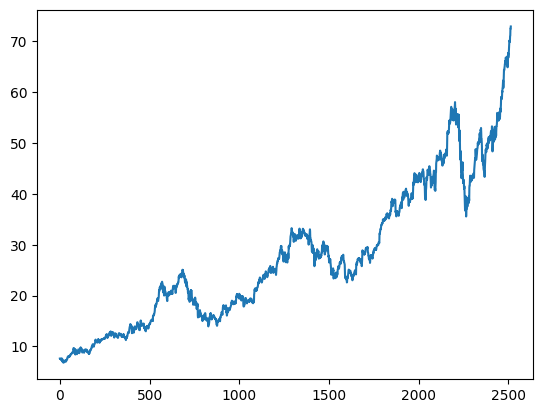

In [15]:
plt.plot(df.Close)

In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,59.201075
2511,59.401700
2512,59.643125
2513,59.875125


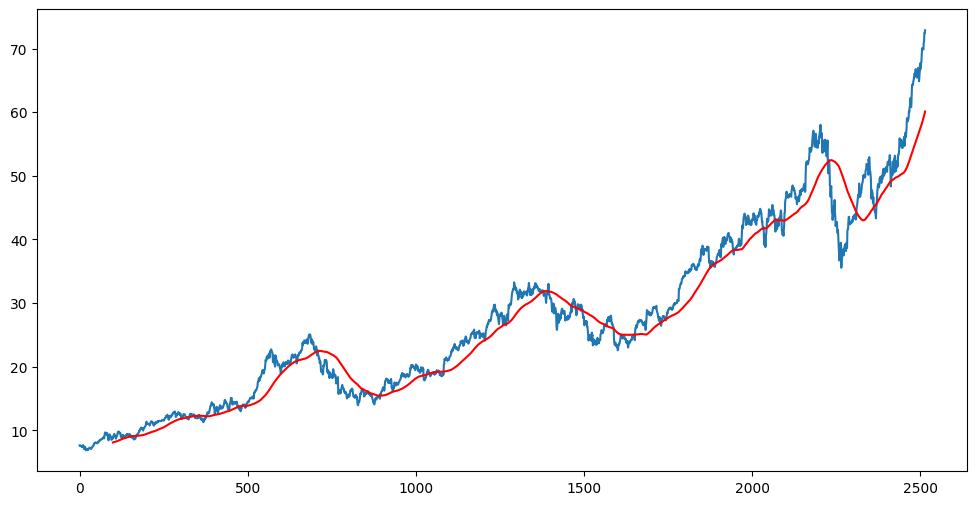

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [18]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,54.132313
2511,54.261513
2512,54.396763
2513,54.529350


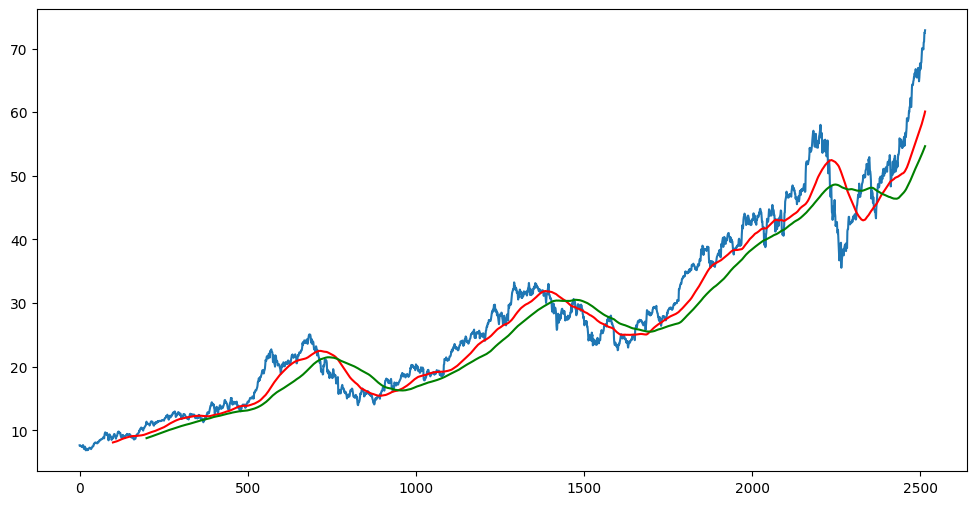

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [20]:
df.shape


(2515, 5)

In [21]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [22]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [23]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [24]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [26]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ML MODEL




In [27]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - loss: 0.0182
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - loss: 0.0088
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - loss: 0.0085
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 308ms/step - loss: 0.0085
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - loss: 0.0075
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - loss: 0.0065
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 291ms/step - loss: 0.0065
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 308ms/step - loss: 0.0072
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - loss: 0.0057
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 296ms/step - loss: 0.0059
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 298ms/step - loss: 0.0067
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0059
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - loss: 0.0064
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - loss: 0.0048
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [32]:
model.save('keras_model.h5')

In [33]:
past_100_days = data_training.tail(100)

In [35]:
# Use pd.concat instead of append
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [36]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [38]:
input_data.shape

(855, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [41]:
# making predictions

y_predicted = model.predict(x_test)

y_predicted.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step


(755, 1)

In [42]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [43]:
y_predicted

array([[0.16381806],
       [0.16403988],
       [0.16425759],
       [0.16446224],
       [0.16464625],
       [0.16480479],
       [0.16494055],
       [0.16505495],
       [0.16515696],
       [0.16525921],
       [0.16536665],
       [0.16548835],
       [0.1656404 ],
       [0.16581842],
       [0.1660139 ],
       [0.16622925],
       [0.16646269],
       [0.16671054],
       [0.16698235],
       [0.16728538],
       [0.1676316 ],
       [0.16802171],
       [0.16844638],
       [0.16893587],
       [0.16955645],
       [0.17036726],
       [0.17141417],
       [0.17274295],
       [0.17437927],
       [0.17632876],
       [0.1785739 ],
       [0.18107694],
       [0.18377951],
       [0.18654941],
       [0.18936686],
       [0.19219589],
       [0.19500706],
       [0.19777183],
       [0.20045795],
       [0.2030309 ],
       [0.20546822],
       [0.20775066],
       [0.20988482],
       [0.21188737],
       [0.21377537],
       [0.21555805],
       [0.21724148],
       [0.218

In [44]:
scaler.scale_

array([0.02123255])

In [45]:
scale_factor = 1/0.02099517
y_predcited = y_predicted * scale_factor
y_test = y_test * scale_factor

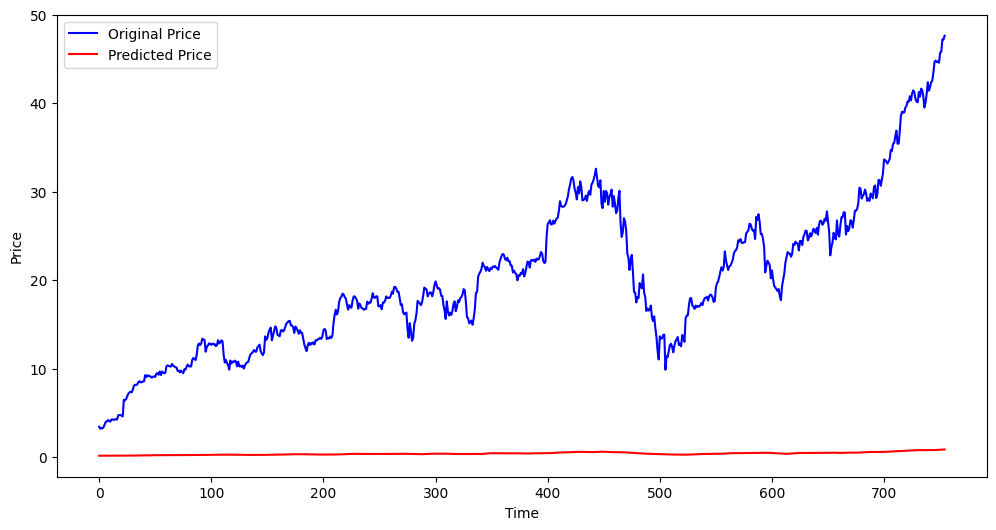

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')
plt.plot(y_predicted, 'r' , label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()